# Quantum Algorithms Practical Session 3  - Bell's inequalities and the CHSH game

---



In 2022, the Nobel proce of physcis was awarded to Alain Aspect, John Clauser and Anton Zelinger for obtaining the first experimental violation of Bell's inequalities in 1982

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/aspect.jpeg'  width="300px" />    
    </tr>
</table>

In this practical session we will obtain the violation of Bell's inequalities on the IBM Quantum Experience.


---
## Get ready
As usual one first  import Qiskit and the vizualisation tools
```Python
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
```
And as well we load the simulator and the IBM account:

```Python
simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibmq_lima')
from qiskit.tools.monitor import job_monitor

```
   

In [1]:
from qiskit import*
from qiskit.tools.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')

# IBMQ.save_account('4218c7e34a05831f4fb728b96d0770d7fcddfa2592d7ff6e16447d9c2053520793f8c630f07c4753c45cc84986f6cff97a74eb8069fd28696a382b74c0ab86b7')
# IBMQ.load_account()

# provider=IBMQ.get_provider('ibm-q')
# qcomputer=provider.get_backend('ibm_brisbane')

# job=execute(circuit,backend=qcomputer)

# from qiskit.tools.monitor import job_monitor
# job_monitor(job)
# result=job.result()
# plot_histogram(result.get_counts(circuit))

## Entanglement

Nowadays in quantum information, entanglement is considered as a resource as it allows protocols or algorithms that have no classical counterpart (like in the superdense coding or the teleportation protocol).

Create a circtuit that generate the two-qubit entangled states $|EPR\rangle$

$$|EPR\rangle=\dfrac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$$

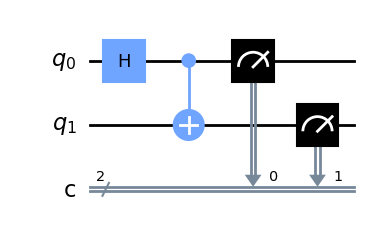

In [2]:
# Create bell state
circuit=QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])

# Draw circuit
circuit.draw(output='mpl')

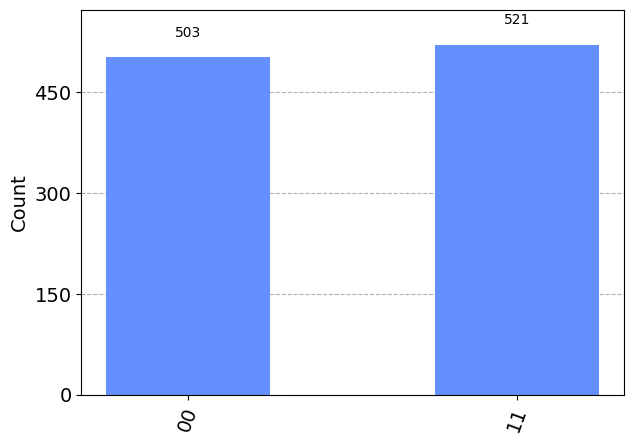

In [5]:
counts=execute(circuit,backend=simulator,shots=1024).result().get_counts()
plot_histogram(counts)

At first the existence of entanglement was pointed out by Einstein as a paradox invalidating the foundations of quantum physics (Einstein A, Podolsky B, Rosen N. Physical review. 1935 May 15;47(10):777).

Thirty years later John Bell proposed inequalities based on Einstein's assumptions which should be violated by the results of quantum mechanics (Bell JS. Physics Physique Fizika. 1964 Nov 1;1(3):195). 

These inequalities opened the path to an experimental tests which turned out to confirm the existence of entanglement (Aspect A, Grangier P, Roger G. Physical review letters. 1982 Jul 12;49(2):91).

## Bell's inequalities

In what follows we propose to test Bell's inequalities on the IBM Quantum Experiement.

Suppose you have a two qubit system $|\psi\rangle$ Let us denote $AB=A\otimes B$ the two-qubit operator representing a measurment in the $A$-Basis for the first qubit and the $B$-basis for the second (we also call such operator an observable). We denote by $\langle AB\rangle_\psi=\langle\psi|AB|\psi\rangle$ the expectation of this specific two qubit measurement.

One considers the following Bell's operator:
\begin{equation}
 C=\langle AB \rangle+\langle AB' \rangle+\langle A'B \rangle-\langle A'B' \rangle
\end{equation}
where $A,B,A',B'$ are one qubit observables, i.e. hermitian operator with $\pm 1$ eigenvalues.

Explain why if we assume that the outcomes of the measurements $A, B, A', B'$ are deterministic and local (no correlation between the two partites), then $|C|\leq 2$

Suppose $A=Z, A'=X, B=\dfrac{Z+X}{\sqrt{2}}$ and $B'=\dfrac{Z-X}{\sqrt{2}}$. Create the four quantum circuits corresponding to the four measurements involve in the calculation of $C$.
(Hint: for measuring in the $\dfrac{Z+X}{\sqrt{2}}$ basis you first consider the rotation matrix that goes from the standard basis $|0\rangle$, $|1\rangle$ to the $\dfrac{Z+X}{\sqrt{2}}$. This rotation matrix is $$R=\begin{pmatrix}
\cos(\pi/8) & -\sin(\pi/8)\\
\sin(\pi/8) & \cos(\pi/8)
\end{pmatrix}, \text{ i.e. } \theta=\pi/4 \text{ and } \phi=0.$$
Then the Qiskit gate $U$ should allow you to implement the $R^\dagger$ gate.)

Make the four measurments for $|\psi\rangle=\dfrac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. Why is it a violation of Bell's inequalities ?

What is the theoretical value of $C$ for $|\psi\rangle=\dfrac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ ?

## CHSH game

The CHSH game is a reformulation of Bell's inequalities in the context of quantum game.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/chsh.png'  width="300px" />    
    </tr>
</table>

The CHSH game goes as follow:
- Alice and Bob play against the referee Charlie but can't communicate during the game
- Charlie send a question $x\in\{0,1\}$ to Alice and $y\in \{0,1\}$ to Bob
- Alice send back $a\in\{0,1\}$ to Charlie and Bob send back $b\in \{0,1\}$
- They win the game if $a\oplus b=x.y mod 2$

One can prove that classically  Alice and Bob win the game with maximum probability $0.75$. For instance if the questions of the referee are uniformly random Alice and Bob win 3 out of 4 times by always answering $a=0$ and $b=0$.

However there is a quantum strategy that allows to win the game with probability $\cos^2(\pi/8)\approx 0.85$:
- Alice and Bob share a EPR pair
- For $x=0$ Alice performs a $Z$-measurement on her qubit otherwise she performs $X$-measurement she sends back $a$ the result of her measurement
- For $y=0$ Bob does a  $\dfrac{X+Z}{\sqrt{2}}$-measurement on his qubit otherwise he does a $\dfrac{Z-X}{\sqrt{2}}$-measurement. He sends back $b$ the result of his measurement

Implement the quantum strategy on qiskit and check that Alice and Bob win the game more often than with a classical strategy.

## Ekert91 key distribution

Ekert91 is a protocol that allows Alice and Bob to create a secret key in order to implement the classical one-time pad protocol. The Ekert91 protocols is based on the following idea:
- Suppose you have a source that emits EPR states and send one qubit to Alice and one qubit to Bob
- Alice and Bob will measure their qubit within some random choice of basis
- After the experiments they reveals to each other their choice of basis
- the measurement obtained for the same choice of basis will be kept to make their secret key
- the measurement where the choice of basis do not match are used to check Bell's inequalities and verify that the source was really entangled (and thus that nobody could guess the outcomes of their measurement)

In Ekert's original protocol there are three basis of measurement used for Alice and Bob:
- Alice $Z$ basis, $\dfrac{Z+X}{\sqrt{2}}$-basis and $X$-basis
- Bob $\dfrac{Z+X}{\sqrt{2}}$-basis, $X$-basis, $\dfrac{Z-X}{\sqrt{2}}$-

Implement Ekert91 with Qiskit